# Ranging and Ransac

We'll use the following imports:

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

If you get an error from importing sklearn, then you will have to install it using:
conda install scikit-learn

For the exercise we will be using the data taken from a lidar by a robot in a hallway. The data is saved in `laser.csv` and we can import this in Python using numpy as such:

In [3]:
laser = np.genfromtxt('laser.csv', delimiter=',')

The file contains only a single rotation of the lidar. You can open the file in any text editor to get a look at the data. Each number in the file is the distance measured in meters. The lidar starts measuring at 135 degrees and ends at -135 degrees and it rotates the same amount between each measurement. 

## Exercise 3.1
Convert the data in the csv file to x and y coordinates in a Carthesian coordinate system and plot the result using matplotlib.

Hint: Use [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) instead of plt.plot in order to show every measurement as a point. 

(541,)


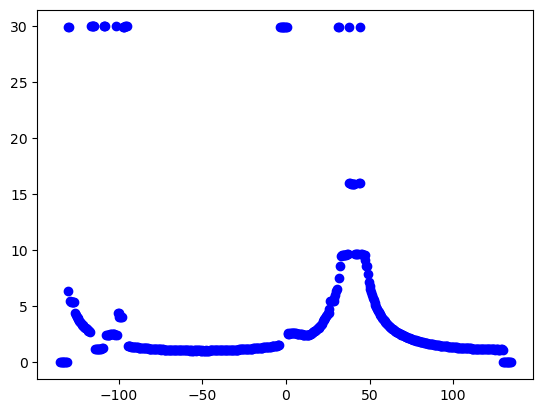

In [16]:
# Convert to x and y coordinates
print(laser.shape)
x = np.arange(-135, 135,0.5) 
y = laser[1:]

plt.scatter(x,y,c="blue")
plt.show()

## Exercise 3.2

We would like to locate one of the walls in the dataset. To do so we will use [Ransac](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html) to fine the best line fit in the noisy data. A Ransac regressor is initialized the following way using sklearn:

Now that we have our Ransac regressor we can fit it to a dataset (x,y):

Finally, to get the fitted line we can use the predict function. As an argument this takes the x values in which the line will be predicted:

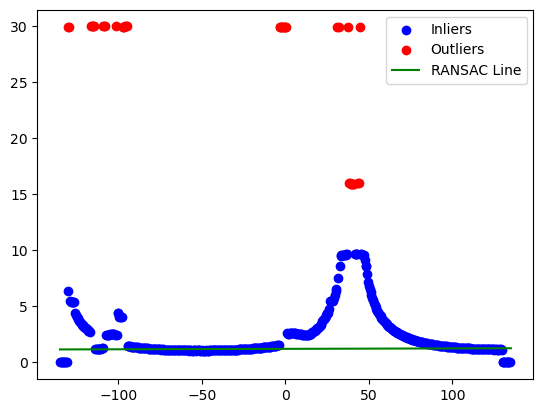

In [20]:
ransac = linear_model.RANSACRegressor(estimator=linear_model.RANSACRegressor(),
                         min_samples=50, max_trials=1000,
                         residual_threshold=10)
ransac.fit(x.reshape(-1, 1), y)

# Extract the inlier and outlier data points
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Plot the data points and the fitted line
plt.scatter(x[inlier_mask], y[inlier_mask], color='blue', label='Inliers')
plt.scatter(x[outlier_mask], y[outlier_mask], color='red', label='Outliers')
line_x = np.array([-135, 135])
line_y = ransac.predict(line_x.reshape(-1, 1))
plt.plot(line_x, line_y, color='green', label='RANSAC Line')
plt.legend(loc='upper right')
plt.show()

Plot the line on top of the scatterplot from before to see the fit.

## Exercise 3.3

To see which data points were used to make the line fit and which were deemed outliers, we can use the function ransac.inlier_mask_

In [ ]:
plt.scatter(x[ransac.inlier_mask_], y[ransac.inlier_mask_], color='green')

Find the second hallway wall using another Ransac fit and plot it together with the data points and the first ransac fit.

Hint: Use the outliers from the first Ransac.

In [ ]:
ransac2 = linear_model.RANSACRegressor()

# Find the second hallway wall